# Author: 
### Tamal Majumder - Department of Physics , IIT Delhi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Total Variation function

In [2]:
def total_variation(g):
    grad_x, grad_y = np.gradient(g)
    TV = np.sum(np.sqrt(grad_x**2 + grad_y**2))
    return TV

## Gradient of TV = => (∇TV(g))

In [3]:
def grad_tv(g):
    grad_x, grad_y = np.gradient(g)
    norm_grad = np.sqrt(grad_x**2 + grad_y**2)
    norm_grad[norm_grad == 0] = 1  # To avoid division by zero
    h_x = grad_x / norm_grad
    h_y = grad_y / norm_grad
    h = np.gradient(h_x)[0] + np.gradient(h_y)[1]
    return h

## Loading and preprocessing the image

In [4]:
image_path = r'D:\1.Study stuff\SEM 3 @IITD\Optical Imaging\Assignment 2\Test.jpg'
image = Image.open(image_path).convert('L')  # Converting to grayscale
image = np.array(image) / 255.0  # Normalizing pixel values to [0, 1]

# Making a copy for the image for processing on it
g = image.copy()

## Performing the optimization :

In [5]:
TVs = []  # For storing total variation in each itterative loop
for n in range(25): # Given no of itteration
    tv = total_variation(g)
    h = -grad_tv(g)
    step_size = 5e-3  
    g = g - step_size * np.linalg.norm(g) * h / np.linalg.norm(h) 
    TVs.append(tv)

## Printing the final TV and matrix h

In [6]:
final_tv = total_variation(g)
print(f" * Initial TV: {total_variation(image)}")
print(f" * Final TV after 25 iterations: {final_tv}")

# Printing the matrix h
print("\nMatrix h = ∇TV(g):\n")
print(grad_tv(g))

 * Initial TV: 83066.70843634507
 * Final TV after 25 iterations: 23536.249209381753

Matrix h = ∇TV(g):

[[ 0.37640345  0.05855352 -0.0676364  ... -0.59904383 -0.38597729
  -0.19871513]
 [ 0.63020582  0.54852162  0.49259555 ... -0.11293598  0.2409358
   0.92317496]
 [ 0.36500311  0.02932343 -0.69313673 ... -0.94282041 -0.63040425
   0.58786656]
 ...
 [-0.63662414 -0.00475128  0.24831612 ...  1.49655849  0.62316748
  -0.3700658 ]
 [ 0.22431272  0.24931516  0.22344397 ...  0.47478212 -0.09238439
   0.6253699 ]
 [ 0.0870555  -0.0263892   0.54403634 ... -0.57598897 -0.10288929
   0.5031889 ]]


## Plotting the images

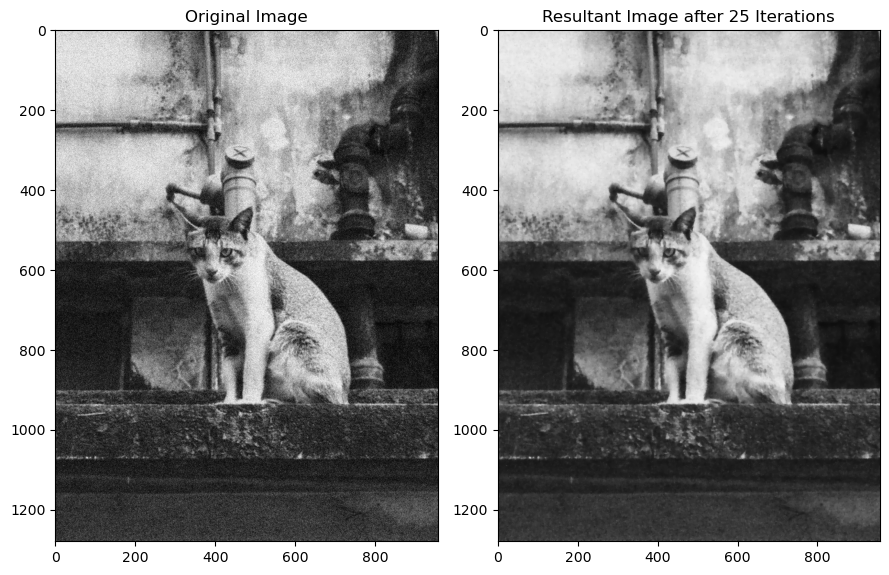

In [7]:
# Displaying the original image
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Displaying the resultant image
plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')
plt.title('Resultant Image after 25 Iterations')
plt.tight_layout()
plt.show()

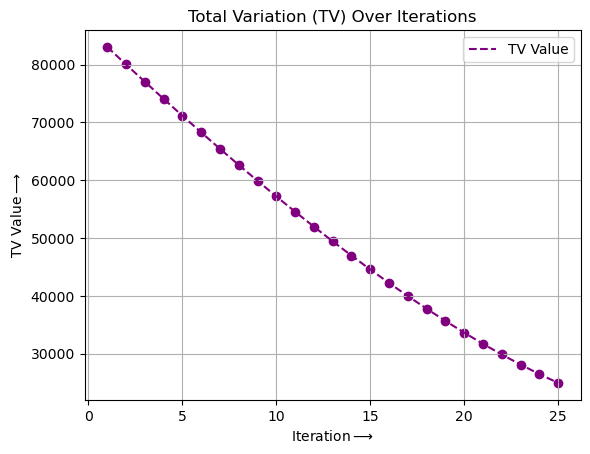

In [8]:
# Plotting TV values
plt.plot(np.arange(1, len(TVs)+1), TVs, color='purple', linestyle='--', label='TV Value')
plt.scatter(np.arange(1, len(TVs)+1), TVs, color='purple')
plt.title('Total Variation (TV) Over Iterations')
plt.xlabel(r'Iteration$\longrightarrow$')
plt.ylabel(r'TV Value$\longrightarrow$')
plt.grid(True)
plt.legend()
plt.show()
